# Boruta

In [1]:
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score

import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("Covid-19_dataset.csv",header=1)


# df['is_Male'] = pd.get_dummies(df['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0

df = pd.concat([df, pd.get_dummies(df['Blood_Group'])], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CONTROL_blood_group'])], axis=1) # needed to remove may not be needed
# df = pd.concat([df, pd.get_dummies(df['Risk_Factor'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Infection_type'])], axis=1)

blood_types = pd.get_dummies(df['Blood_Group']).columns


df = df.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)

columns = df.columns



# getting rid of blank values
print("before",len(df))
for name in columns:
    df = df[df[name] != " "]
    df = df.dropna()
    
label_Severeity = df['Severeity'] #Severeity vs Outcome
label_Outcome = df[["Outcome"]]
df = df.drop(['Severeity','Outcome'],axis=1)

df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
columns = df.columns


print("after",len(df))

before 5668
after 5641


In [3]:
blacklist = ['Risk_Factor_NONE',' Incubation period (days)']

In [4]:
df = pd.read_csv("Covid-19_dataset.csv",header=1)


# df['is_Male'] = pd.get_dummies(df['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0
# df = df.drop([''Gender''])

blood_types = pd.get_dummies(df['Blood_Group']).columns
blood_group_columns = pd.get_dummies(df[['Blood_Group','CONTROL_blood_group']]).columns


df = pd.concat([df, pd.get_dummies(df[['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type']])], axis=1)



df = df.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)

columns = df.columns



# getting rid of blank values
print("before",df.shape)
for name in columns:
    df = df[df[name] != " "]
    df = df.dropna()
    
label_Severeity = df['Severeity'] #Severeity vs Outcome
label_Outcome = df['Outcome']
df = df.drop(['Severeity','Outcome'],axis=1)


df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))#strings to numeric
all_columns = df.columns
# df = df.reset_index()

print("after",df.shape)





before (5668, 56)
after (5641, 54)


In [5]:
blood_type_labels =[]
control_blood_type_labels = []
for i in blood_group_columns:
    if("CONTROL_" in i):
        control_blood_type_labels.append(i)
    else:
        blood_type_labels.append(i)

In [6]:
df['Outcome'] = label_Outcome

In [7]:
# bType = "A+"
# bloodGroup = 'Blood_Group_' + bType
# # # print(bloodGroup)
# feature_cols = [bloodGroup, 'Fever ', 'Chills', 'Cough', 'Dyspnea', 'Anosmia_Ageusia', 'Loss_of_appetite',
#                 'Asthenia', 'Headache', 'Muscle_ache', 'Cyanosis', 'Rhinorrhea', 'Sore_throat', 'Diarrhea',
#                 'Nausea_vomiting']

In [8]:
allFeatures=['Age', ' Incubation period (days)', 'Fever ', 'Chills', 'Cough',
       'Dyspnea', 'Anosmia_Ageusia', 'Loss_of_appetite', 'Asthenia',
       'Headache', 'Muscle_ache', 'Cyanosis', 'Rhinorrhea', 'Sore_throat',
       'Diarrhea', 'Nausea_vomiting', 'is_Male', 'Blood_Group_A+',
       'Blood_Group_A-', 'Blood_Group_AB+', 'Blood_Group_AB-',
       'Blood_Group_B+', 'Blood_Group_B-', 'Blood_Group_O+', 'Blood_Group_O-',
       'CONTROL_blood_group_A+', 'CONTROL_blood_group_A-',
       'CONTROL_blood_group_AB+', 'CONTROL_blood_group_AB-',
       'CONTROL_blood_group_B+', 'CONTROL_blood_group_B-',
       'CONTROL_blood_group_O+', 'CONTROL_blood_group_O-', 'Risk_Factor_AP',
       'Risk_Factor_ARF', 'Risk_Factor_AT', 'Risk_Factor_CA',
       'Risk_Factor_CKD', 'Risk_Factor_CLD', 'Risk_Factor_COPD',
       'Risk_Factor_COPDDM', 'Risk_Factor_COPDHT', 'Risk_Factor_DM',
       'Risk_Factor_DMARF', 'Risk_Factor_DMAT', 'Risk_Factor_DMCKD',
       'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_HT ',
       'Risk_Factor_NONE', 'Risk_Factor_RF', 'Infection_type_Asymptomatic',
       'Infection_type_Asymtomatic', 'Infection_type_Symptomatic',
       'Infection_type_Symtomatic']

In [9]:
# df = df[feature_cols]

In [10]:
# set(allFeatures)-set(feature_cols)

In [11]:
featureColsArr = {'Blood_Group_A-':['Blood_Group_A-', 'Cyanosis', 'Nausea_vomiting', 'Chills', 'Diarrhea', 'Cough'],
                  'Blood_Group_A+':['Blood_Group_A+', 'Cyanosis', 'Nausea_vomiting', 'Chills', 'Diarrhea', 'Cough'],
                  'Blood_Group_AB-':['Blood_Group_AB-', 'Cyanosis', 'Nausea_vomiting', 'Chills', 'Diarrhea', 'Cough'],
                  'Blood_Group_AB+':['Blood_Group_AB+', 'Cyanosis', 'Nausea_vomiting', 'Diarrhea', 'Cough', 'Muscle_ache'],
                  'Blood_Group_B-':['Blood_Group_B-', 'Cyanosis', 'Nausea_vomiting', 'Chills', 'Diarrhea', 'Cough'],
                  'Blood_Group_B+':['Blood_Group_B+', 'Cyanosis', 'Nausea_vomiting', 'Chills', 'Diarrhea', 'Cough'],
                  'Blood_Group_O-':['Blood_Group_O-', 'Cyanosis', 'Nausea_vomiting', 'Chills', 'Diarrhea', 'Cough'],
                  'Blood_Group_O+':['Blood_Group_O+', 'Cyanosis', 'Nausea_vomiting', 'Chills', 'Diarrhea', 'Cough']} 

In [12]:
af = None
cf = None

In [13]:
def AUCBloodTypeComparison(model,K=10):
    plt.subplot(1, 2, 1)
    plt.figure(figsize=(10,6))

    
    %matplotlib inline

    for bt in blood_type_labels:
        
        
        y = df['Outcome']
        feature_cols = [bt, 'Fever ', 'Chills', 'Cough', 'Dyspnea', 'Anosmia_Ageusia', 'Loss_of_appetite',
                        'Asthenia', 'Headache', 'Muscle_ache', 'Cyanosis', 'Rhinorrhea', 'Sore_throat', 'Diarrhea',
                        'Nausea_vomiting']
        all_features = df[feature_cols]
        
        
        X_train, X_test, y_train, y_test = train_test_split(all_features, y, test_size=0.2, random_state=4)
        
        
        if(len(y_train.unique()) == 1 or len(y_test.unique()) == 1):
            continue
        
        # Training ONLY on the training set to get AUC:
        tempModel = copy.deepcopy(model)
        model.fit(X_train, y_train)
        prob = model.predict_proba(X_test)
        
        if(len(prob[0]) == 1):
            continue
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1], pos_label='Recovered')
        AUC = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,label=f"{bt} : {round(AUC,3)}")
        


    plt.figlegend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'All Features ROC Curve')
    plt.show()
    
    
    
    plt.subplot(1, 2, 2)
    plt.figure(figsize=(10,6))

    
    %matplotlib inline

    for bt in blood_type_labels:
        
        
        y = df['Outcome']
        feature_cols = featureColsArr[bt]
        all_features = df[feature_cols]
        
        
        X_train, X_test, y_train, y_test = train_test_split(all_features, y, test_size=0.2, random_state=4)
        
        
        if(len(y_train.unique()) == 1 or len(y_test.unique()) == 1):
            continue
        
        # Training ONLY on the training set to get AUC:
        tempModel = copy.deepcopy(model)
        model.fit(X_train, y_train)
        prob = model.predict_proba(X_test)
        
        if(len(prob[0]) == 1):
            continue
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1], pos_label='Recovered')
        AUC = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,label=f"{bt} : {round(AUC,3)}")
        


    plt.figlegend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Core Features')
    plt.show()
    

Ada Boost Classifier


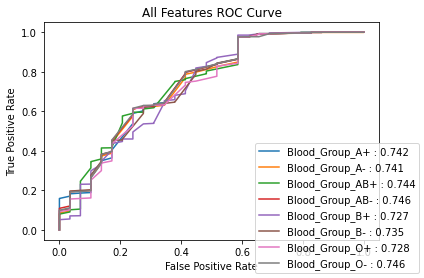

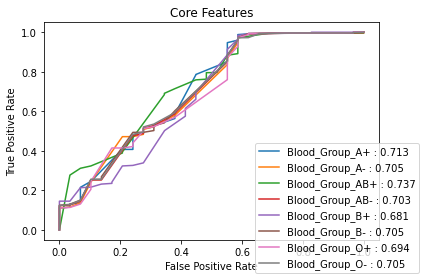

In [14]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
AUCBloodTypeComparison(my_AdaBoost)

SVM


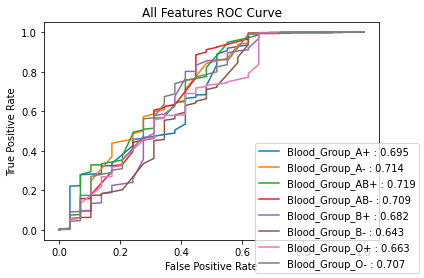

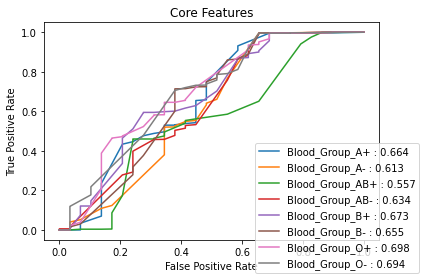

In [15]:
print("SVM")
my_svm = SVC(kernel='rbf', probability=True)
AUCBloodTypeComparison(my_svm)

Decision Tree


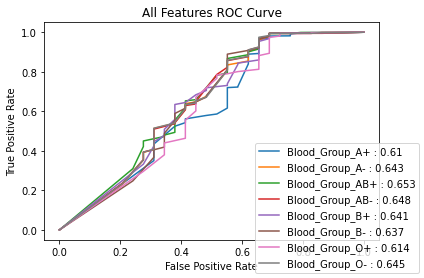

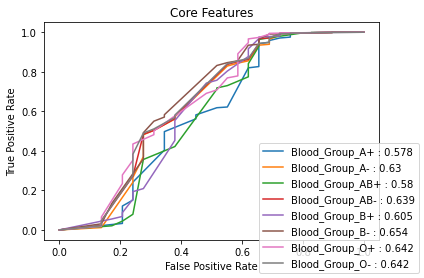

In [16]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
AUCBloodTypeComparison(my_DecisionTree)

Random Forest Classifier


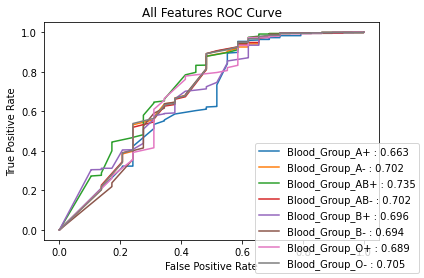

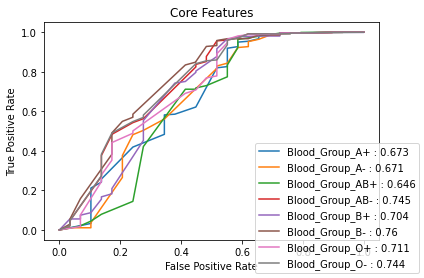

In [17]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
AUCBloodTypeComparison(my_RandomForest)